In [10]:
from PIL import Image
import numpy as np

basketball.jpg JPEG 1024 x 682 RGB


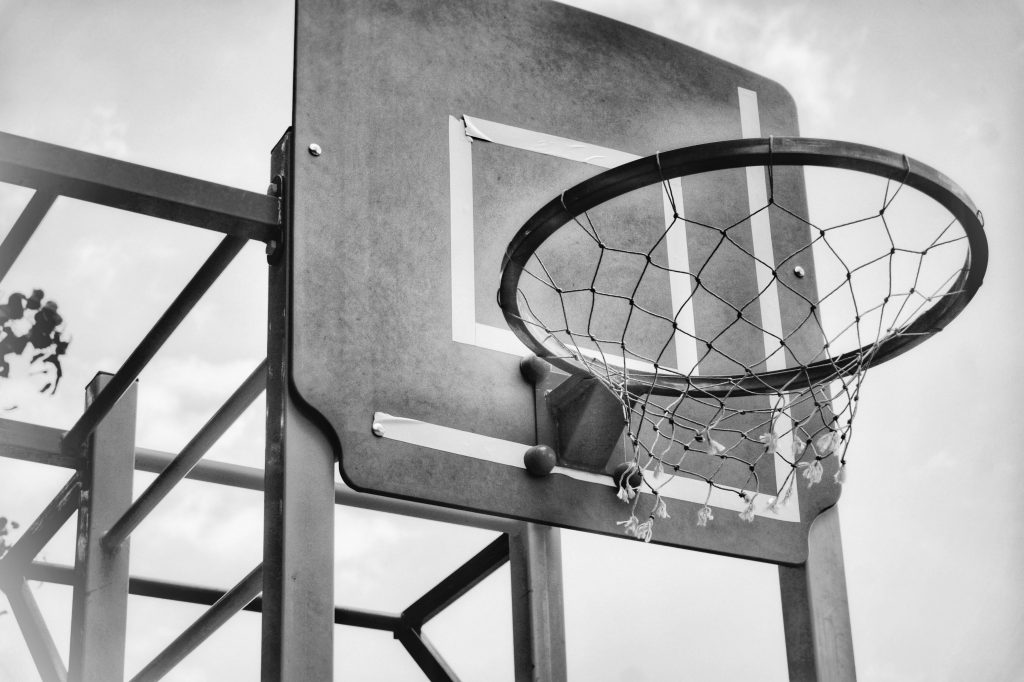

In [11]:
my_file = 'basketball.jpg'

my_image = Image.open(my_file)
my_image_width = my_image.size[0]
my_image_height = my_image.size[1]
print(my_file, my_image.format, my_image_width, 'x', my_image_height, my_image.mode)

my_image

Thanksgiving.jpg JPEG 767 x 771 L


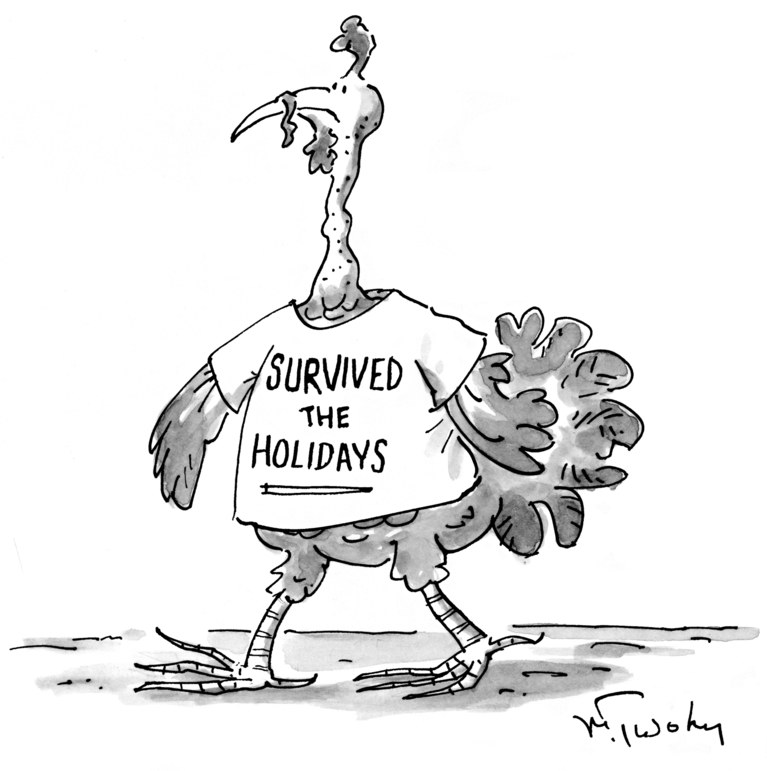

In [9]:
in_file = 'Thanksgiving.jpg' #on canvas

image = Image.open(in_file)
image_width = image.size[0]
image_height = image.size[1]
print(in_file, image.format, image_width, 'x', image_height, image.mode)

image

Get images pixels into an np array

In [7]:
#Horizontal Edge
y_filter = np.array([1,2,1,0,0,0,-1,-2,-1])
y_filter = np.reshape(y_filter, (3,3))

In [8]:
#Vertical Edge
x_filter = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)])

Convolution function

In [5]:
def conv(my_image, im_row, im_col, x_filter, y_filter):
    '''
    Multiply pixels centered on a single pixel
    at image[im_row, im_col] by corresponding
    values in 3x3 x_filter or y_filter, then
    sums those values, returns square root
    of (xsum**2 + ysum**2)
    '''
    offset = 1    
    xsum = 0
    ysum = 0
    
    for row in range(3):
        image_row = im_row + row - offset
        for col in range(3):
            image_col = im_col + col - offset
            pixel = my_image[image_row, image_col]
            
            filter_value_x = x_filter[row, col]
            xsum += filter_value_x * pixel
            
            filter_value_y = y_filter[row, col]
            ysum += filter_value_y * pixel
        
    conv_pixel = np.sqrt(xsum**2 + ysum**2)
    return conv_pixel

Edgy

In [12]:
white = 255
black = 0
threshold = 115

pix = np.array(my_image)
new_image_array = np.array(my_image)

for a_row in range(1, my_image_height - 1):
    for a_col in range(1, my_image_width - 1):
        new_pixel = conv(pix, a_row, a_col, x_filter, y_filter)
        if new_pixel > threshold:
            new_pixdel = black
        else:
            new_pixel = white
        new_image_array[a_row, a_col] = new_pixel
        
new_image = Image.fromarray(new_image_array)
new_image

TypeError: Cannot cast ufunc add output from dtype('int16') to dtype('uint8') with casting rule 'same_kind'

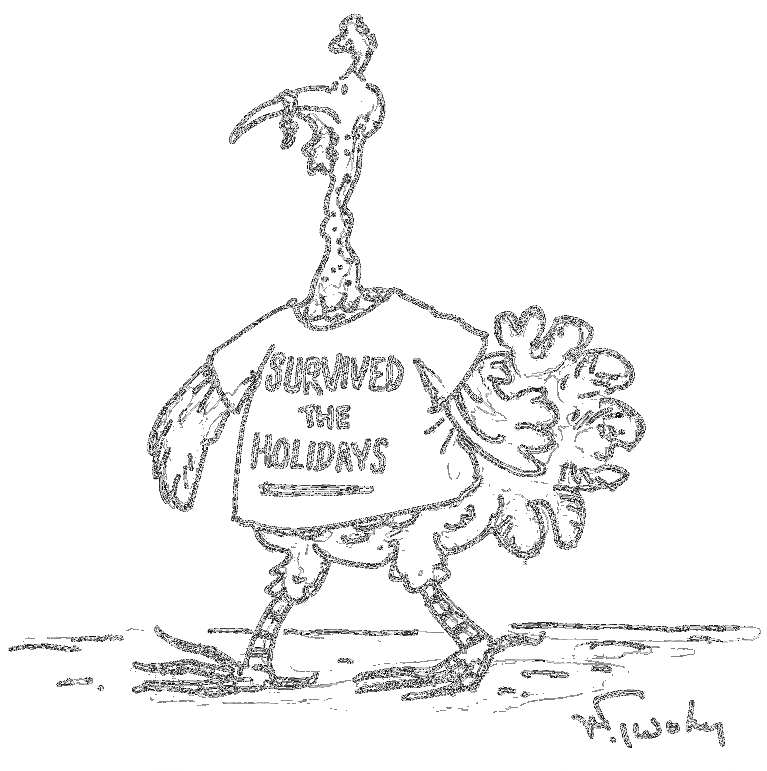

In [6]:
white = 255
black = 0
threshold = 115

pix = np.array(image)
new_image_array = np.array(image)

for a_row in range(1, image_height - 1):
    for a_col in range(1, image_width - 1):
        new_pixel = conv(pix, a_row, a_col, x_filter, y_filter)
        if new_pixel > threshold:
            new_pixdel = black
        else:
            new_pixel = white
        new_image_array[a_row, a_col] = new_pixel
        
new_image = Image.fromarray(new_image_array)
new_image